### Load the dataset

In [1]:
# load the dataset
import pandas as pd
df = pd.read_csv("Datasets_archive/Sample_Superstore.csv", encoding='ISO-8859-1', engine='python')  
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


### Check data types of columns

In [2]:
#check data types of column 
df.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

In [3]:
# check basic statictics of the dataset
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [4]:

df.isnull().sum() # check for null values

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [5]:
df.duplicated().sum() # check for duplicate values

np.int64(0)

In [6]:
df['Order Date'].unique()

array(['11/8/2016', '6/12/2016', '10/11/2015', ..., '6/3/2016',
       '4/12/2015', '1/21/2014'], shape=(1237,), dtype=object)

In [7]:
df['Ship Date'].unique()

array(['11/11/2016', '6/16/2016', '10/18/2015', ..., '5/23/2015',
       '1/23/2014', '3/3/2017'], shape=(1334,), dtype=object)

In [8]:
df['Sales'].describe() # check statistic values of the values of Sales column

count     9994.000000
mean       229.858001
std        623.245101
min          0.444000
25%         17.280000
50%         54.490000
75%        209.940000
max      22638.480000
Name: Sales, dtype: float64

In [9]:
# convert date columns to datetime to allow python work with  their values and not see them  as objects
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [10]:
# rename columns to ds and y for prophet
df.rename(columns={
    'Order Date': 'ds', 
    'Sales': 'y'}, inplace=True)

In [11]:
df.to_csv("Sample_output.csv", index=False)

### check data quality


In [12]:

df[['ds', 'y']].isnull().sum()

ds    0
y     0
dtype: int64

In [13]:
df[['ds', 'y']].describe()

,ds,y
count,9994,9994.000000
mean,2016-04-30 00:07:12.259355648,229.858001
min,2014-01-03 00:00:00,0.444000
25%,2015-05-23 00:00:00,17.280000
50%,2016-06-26 00:00:00,54.490000
75%,2017-05-14 00:00:00,209.940000
max,2017-12-30 00:00:00,22638.480000
std,NaN,623.245101


### explore trends and patterns of sales over time

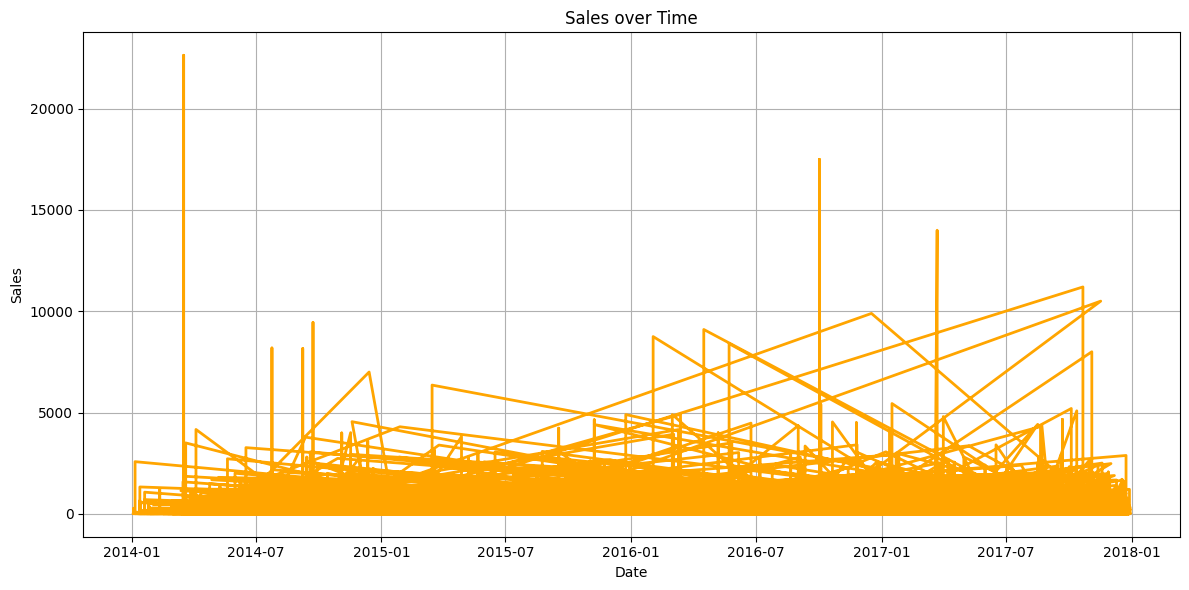

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(df['ds'], df['y'], color='orange', linewidth=2)
plt.title('Sales over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

### Create new features; Month and day of week

In [15]:

df['Month'] = df['ds'].dt.month
df['dayOfWeek'] = df['ds'].dt.dayofweek
df

,Row ID,Order ID,ds,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,y,Quantity,Discount,Profit,Month,dayOfWeek
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,11,1
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,11,1
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,6,6
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,10,6
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,10,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028,1,1
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332,2,6
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932,2,6
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200,2,6


### Create holidays dataframe


In [16]:

holidays = pd.DataFrame({
    'holiday': ['Christmas', 'NewYear', 'International Workers Day'] * 3,
    'ds': pd.to_datetime([
        '2014-12-25', '2015-01-01', '2016-05-01',
        '2015-12-25', '2016-01-01', '2017-05-01',
        '2016-12-25', '2017-01-01', '2018-05-01'
    ]),
    'lower_window': 0,
    'upper_window': 1  # captures effects one day before and after
})

### Train a Forecasting Model with Prophet

In [17]:
from prophet import Prophet
forcast_model = Prophet()
forcast_model = Prophet(holidays=holidays)
forcast_model.fit(df)

c:\Users\tuurozeeng.matthew\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
17:46:25 - cmdstanpy - INFO - Chain [1] start processing
17:46:27 - cmdstanpy - INFO - Chain [1] done processing


### make future Predictions

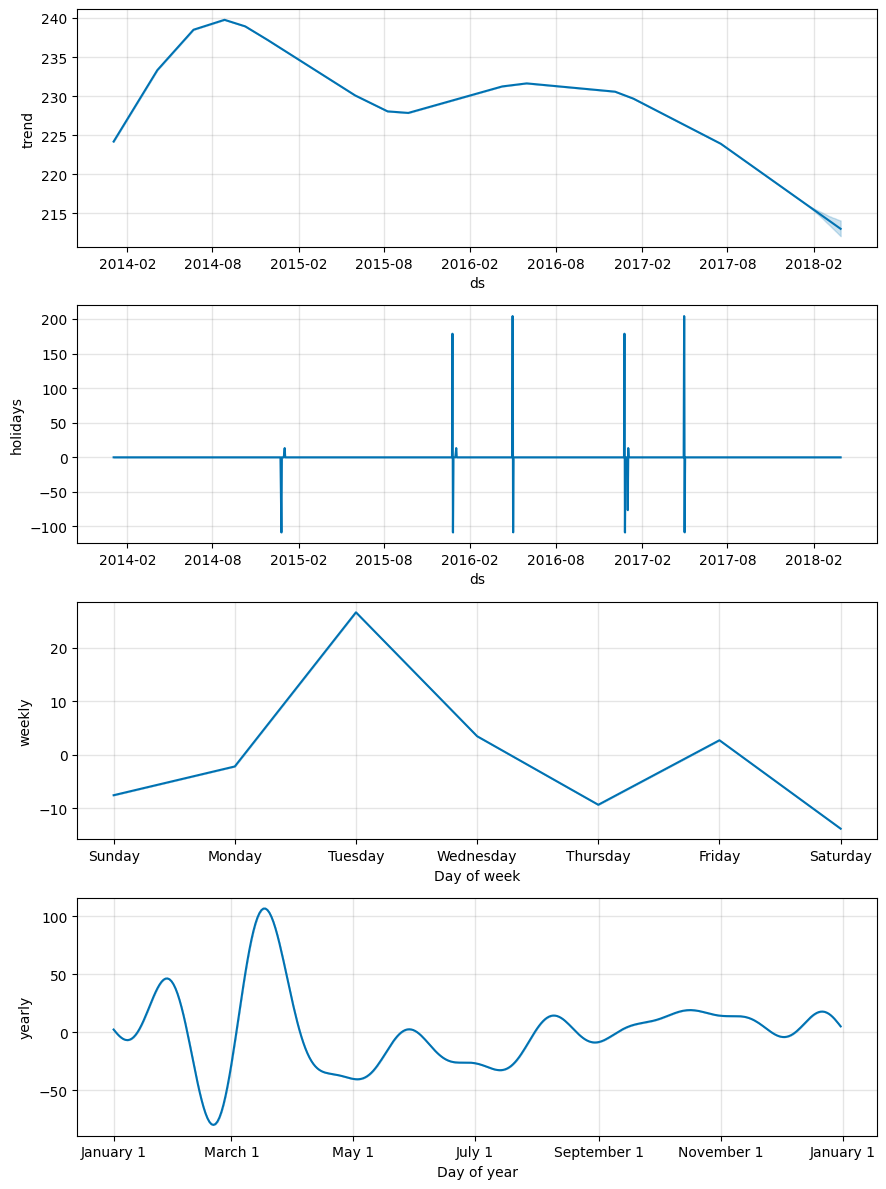

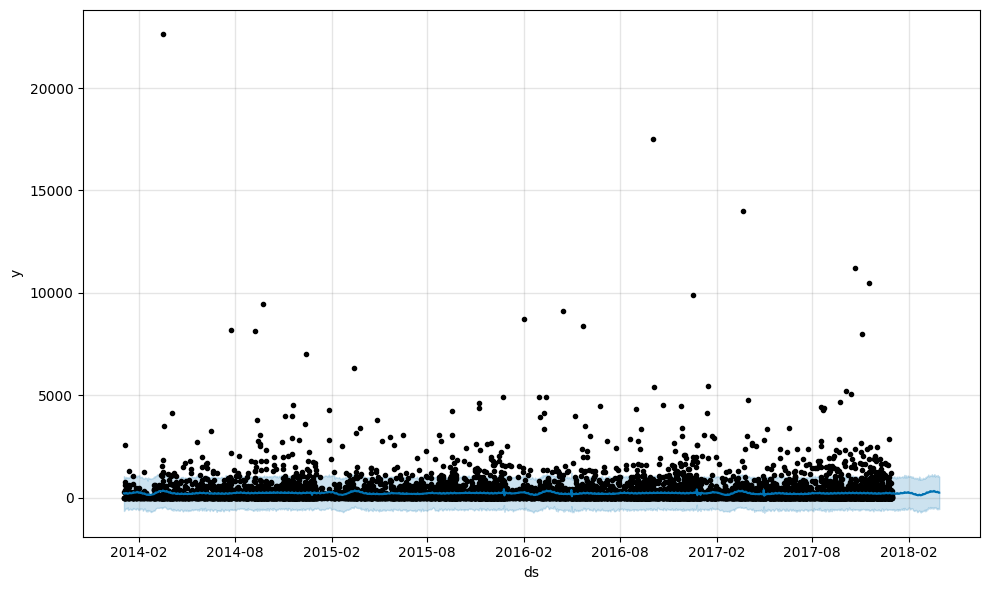

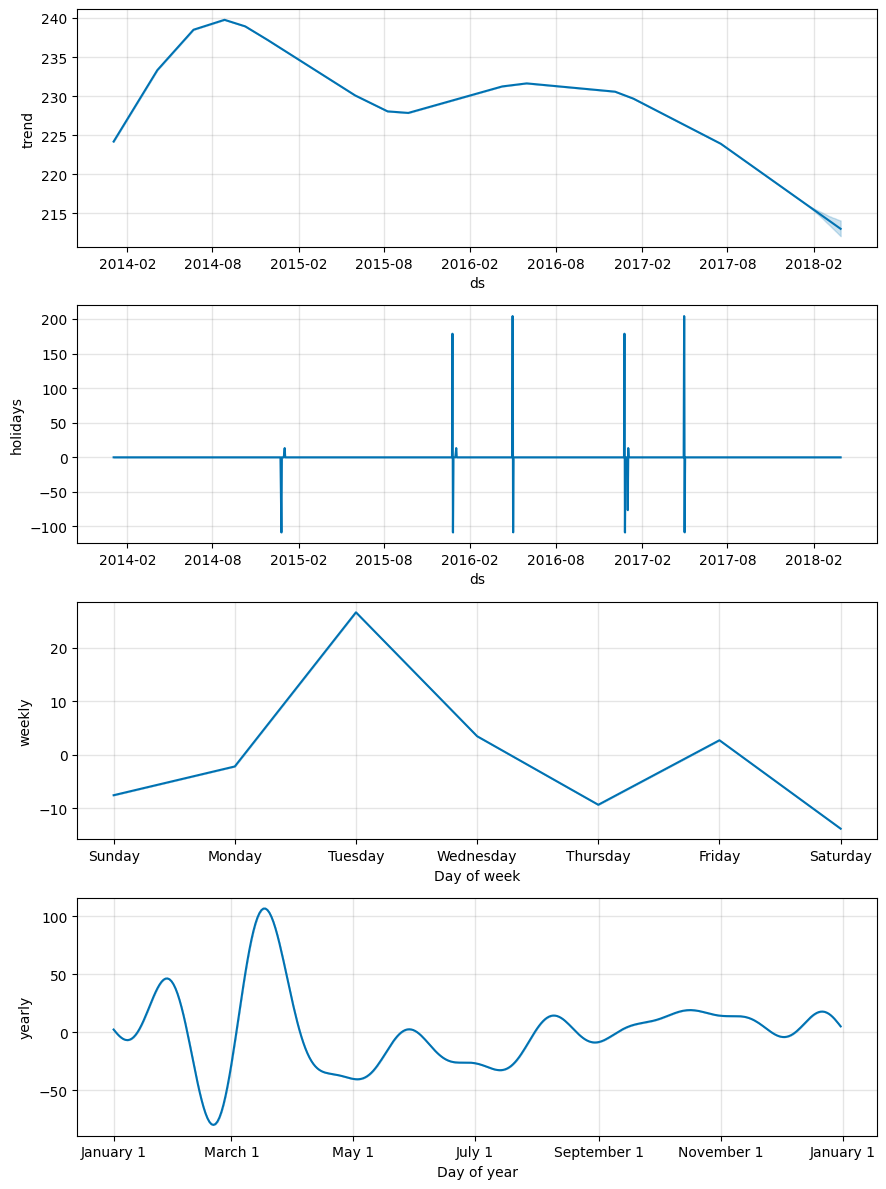

In [18]:
future = forcast_model.make_future_dataframe(periods=90)  # Predict 90 days ahead
forecast = forcast_model.predict(future)
forcast_model.plot(forecast)
forcast_model.plot_components(forecast)

In [19]:
forecast.to_csv("forecast_output.csv", index=False)

### Regression Model for Forecasting

In [20]:
df['dayOfWeek'] = df['ds'].dt.dayofweek # 0 = monday and 6 = sunday
df['Month'] = df['ds'].dt.month
df['day'] = df['ds'].dt.day
df['year'] = df['ds'].dt.year

### lag features

In [21]:
df['lag_1'] = df['y'].shift(1) # sales a day ago
df['lag_7'] = df['y'].shift(7)  # sales a week ago


### Holiday flag

In [22]:
df['is_holiday'] = df['ds'].isin(holidays['ds']).astype(int)


### Features and target

In [23]:
X = df[['dayOfWeek', 'Month', 'lag_1', 'lag_7', 'is_holiday']]  # features
y = df['y']  # target (sales)

### Split data into train and test

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test = X[:-30], X[-30:]
y_train, y_test = y[:-30], y[-30:]

### Train regression model

In [25]:
from sklearn.ensemble import RandomForestRegressor
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

### Evaluate the model

In [26]:
from sklearn.metrics import  mean_squared_error
import numpy as np

rf_pred = random_forest_model.predict(X_test)

mean_sqr_error = mean_squared_error(y_test, rf_pred)
rmse = np.sqrt(mean_sqr_error)

print(f"MAE: {mean_sqr_error:.2f}")
print(f"RMSE: {rmse:.2f}")


MAE: 67213.93
RMSE: 259.26


### Plot actual vs Predicted

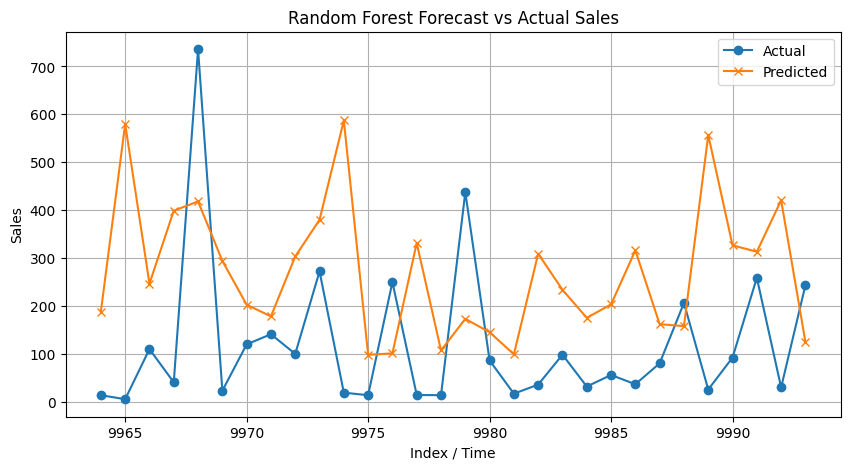

In [27]:
plt.figure(figsize=(10,5))
plt.plot(y_test.index, y_test.values, label='Actual', marker='o')
plt.plot(y_test.index, rf_pred, label='Predicted', marker='x')
plt.title('Random Forest Forecast vs Actual Sales')
plt.xlabel('Index / Time')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

### Which Feature(s) influenced the model most?

In [28]:

important_feature= pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': random_forest_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(important_feature)


      Feature  Importance
2       lag_1    0.445544
3       lag_7    0.372242
1       Month    0.097866
0   dayOfWeek    0.082365
4  is_holiday    0.001983


### Random Forest Prediction Output

In [29]:
random_forest_reg_results = pd.DataFrame({
    'ds': df['ds'][-30:],
    'actual': y_test,
    'predicted': rf_pred
})
random_forest_reg_results.to_csv('regression_forecast.csv', index=False)


### Compare Prophet and Random Forest Models

##### Prophet Forecast Output

In [30]:
prophet_forecast = forecast[['ds', 'yhat']].copy()
prophet_forecast.rename(columns={'yhat': 'prophet_pred'}, inplace=True)


#### Merge both Predcitions

In [31]:
combined = pd.merge(prophet_forecast, random_forest_reg_results, on='ds', how='inner')


#### Compute accuracy metrics for both

In [32]:

# prophet

mae_prophet = mean_squared_error(combined['actual'], combined['prophet_pred'])
rmse_prophet = np.sqrt(mae_prophet)

# random Forest
mae_rf = mean_squared_error(combined['actual'], combined['predicted'])
rmse_rf = np.sqrt(mae_rf)

print(f" Prophet -> MAE: {mae_prophet:.2f}, RMSE: {rmse_prophet:.2f}")
print(f" Random Forest -> MAE: {mae_rf:.2f}, RMSE: {rmse_rf:.2f}")


 Prophet -> MAE: 35432.31, RMSE: 188.23
 Random Forest -> MAE: 67213.93, RMSE: 259.26


### Comparison Visualization

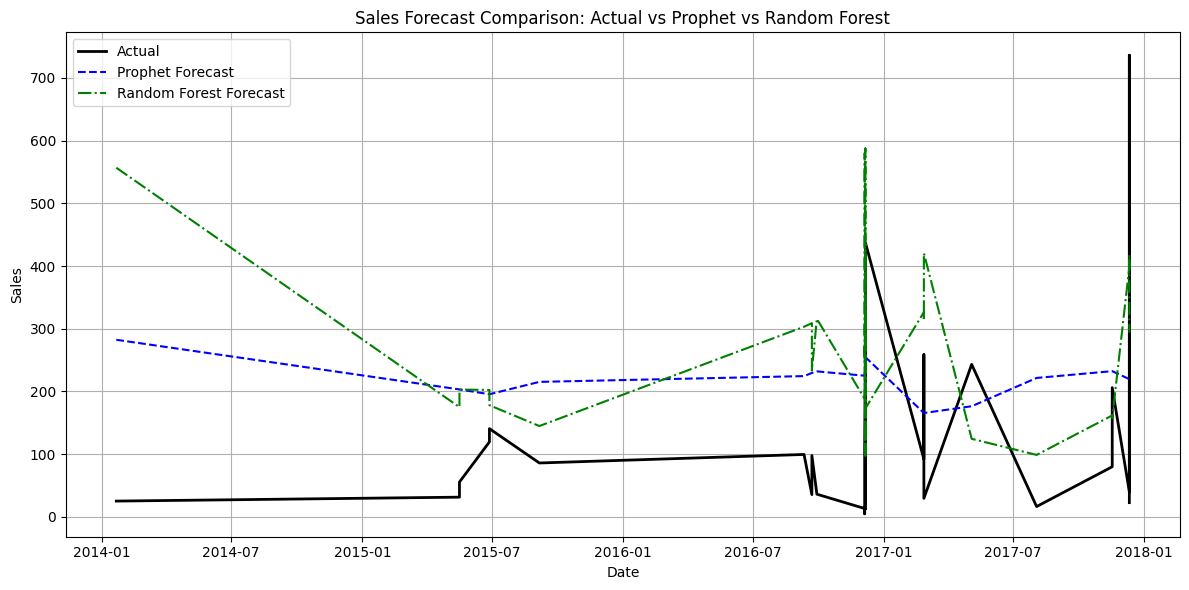

In [33]:

plt.figure(figsize=(12, 6))

# plot actual sales
plt.plot(combined['ds'], combined['actual'], label='Actual', color='black', linewidth=2)

# plot Prophet forecast
plt.plot(combined['ds'], combined['prophet_pred'], label='Prophet Forecast', color='blue', linestyle='--')

# Plot Random Forest forecast
plt.plot(combined['ds'], combined['predicted'], label='Random Forest Forecast', color='green', linestyle='-.')

# Labels and legend
plt.title('Sales Forecast Comparison: Actual vs Prophet vs Random Forest')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()


### Compute Absolute Errors

In [34]:
# Add new columns to the combined dataframe
combined['prophet_error'] = abs(combined['actual'] - combined['prophet_pred'])
combined['rf_error'] = abs(combined['actual'] - combined['predicted'])


### Absolute Error Visualization

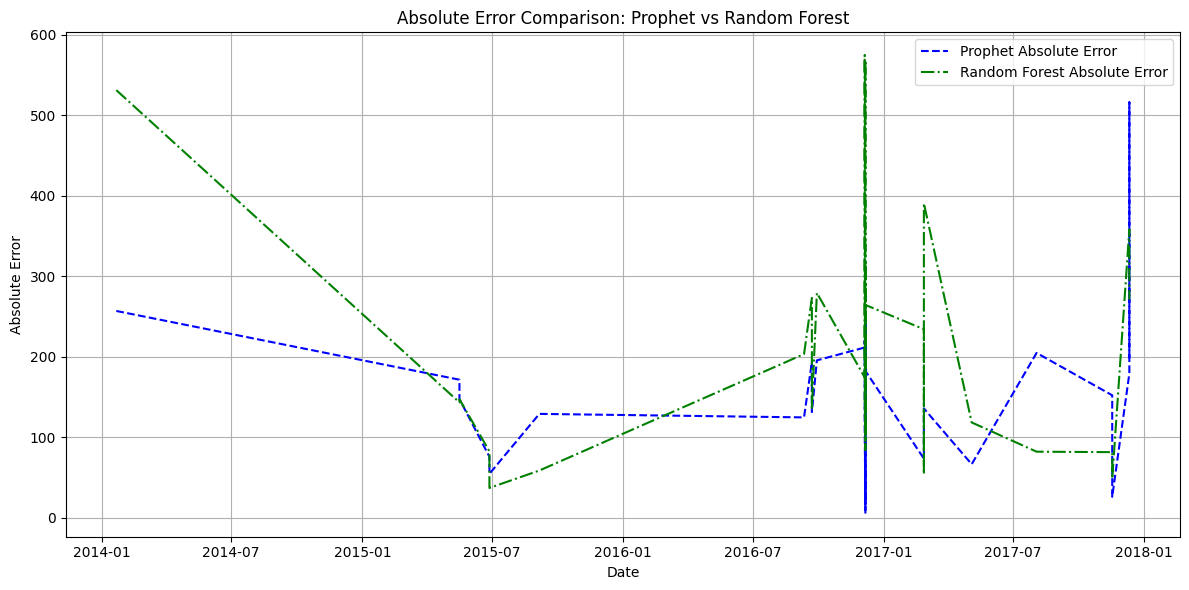

In [35]:

plt.figure(figsize=(12, 6))

# Plot Prophet errors
plt.plot(combined['ds'], combined['prophet_error'], label='Prophet Absolute Error', color='blue', linestyle='--')

# Plot Random Forest errors
plt.plot(combined['ds'], combined['rf_error'], label='Random Forest Absolute Error', color='green', linestyle='-.')

# Labels and formatting
plt.title('Absolute Error Comparison: Prophet vs Random Forest')
plt.xlabel('Date')
plt.ylabel('Absolute Error')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()


In [36]:
combined.to_csv("forecast_comparison.csv", index=False)


### Metrics Table

In [37]:

metrics = {
    'Model': ['Prophet_MAE', 'Prophet_RMSE', 'RandomForest_MSE', 'RandomForest_RMSE'],
    'Metric': ['MAE', 'RMSE', 'MAE', 'RMSE'],
    'Value': [35626.50, 188.75, 65461.99, 255.86]
}

df_metrics = pd.DataFrame(metrics)
df_metrics.to_csv("model_metrics.csv", index=False)
